In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [30]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [31]:
init_notebook_mode(connected=True)
cf.go_offline()

In [32]:
df=pd.read_csv('IRONORELUMPS.csv')

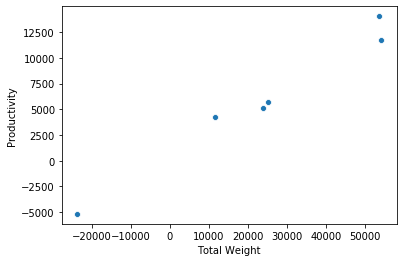

In [33]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [34]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.00000,6.000000,5.000000
mean,1474.833333,195352.666667,33.691667,37.221667,24054.166667,0.241667,0.024167,0.0,2.783333,0.19500,5966.188333,56159.200000
std,323.783518,4212.303440,52.541397,58.726304,29060.296698,0.291508,0.029151,0.0,6.817746,0.47765,6724.719525,622.457388
min,825.000000,192457.000000,0.000000,0.000000,-23800.000000,-0.240000,-0.024000,0.0,0.000000,0.00000,-5164.560000,55759.000000
25%,1531.250000,192457.000000,0.000000,0.000000,14657.500000,0.150000,0.015000,0.0,0.000000,0.00000,4496.355000,55759.000000
50%,1593.500000,192823.500000,0.000000,0.000000,24400.000000,0.245000,0.024500,0.0,0.000000,0.00000,5448.065000,55759.000000
75%,1652.750000,198791.750000,68.662500,70.560000,46412.500000,0.467500,0.046750,0.0,0.000000,0.00000,10248.175000,56342.000000
max,1654.000000,200896.000000,110.600000,129.250000,54165.000000,0.540000,0.054000,0.0,16.700000,1.17000,14038.230000,57177.000000


In [35]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

In [36]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lm.intercept_)

0.003108842420260771


In [38]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.216998


In [39]:
predictions = lm.predict(X_test)


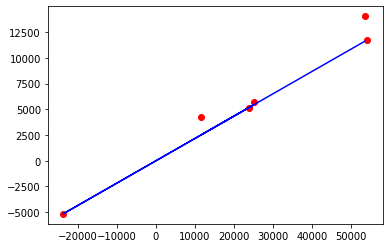

In [40]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 1119.7150493989789
MSE: 2254516.1687123287
RMSE: 1501.5046349286868
r2_score: 0.9514522164445639


In [42]:
joblib.dump(lm,"Iron_Ore_Lumps.pkl")#only execute if rmse is less than half of mean of productivity

['Iron_Ore_Lumps.pkl']